# 🌬️ PyWake Plotting Examples

Denne notebooken viser ulike typer plott du kan generere med PyWake, inkludert wake-kart, effektkurver, og visualisering av produksjon.

**Innhold:**
- Vinddata-visualisering
- Simulering med PyWake
- Wake-kart (vindhastighet, deficit, turbulens)
- Produksjon per vindretning (AEP)
- Effektkurve (power curve)
- Streamlines og vertikale snitt

In [ ]:
# 📦 Installer nødvendige pakker
# !pip install py_wake matplotlib pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from py_wake.examples.data.hornsrev1 import Hornsrev1Site, V80
from py_wake import NOJ
from py_wake.plotstreamlines import plot_streamlines
from py_wake.flow_map import HorizontalGrid, YZGrid

ModuleNotFoundError: No module named 'py_wake.plotstreamlines'

## 🌪️ Vinddata-eksempel (syntetisk)

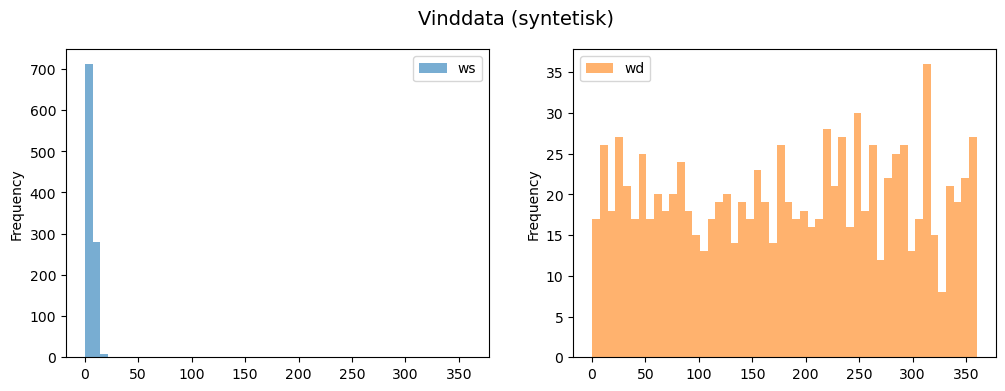

In [2]:
np.random.seed(42)
n = 1000
wind_data = pd.DataFrame({
    'ws': np.random.weibull(a=2, size=n) * 7,
    'wd': np.random.uniform(0, 360, size=n)
})

wind_data[['ws', 'wd']].plot(kind='hist', bins=50, alpha=0.6, subplots=True, layout=(1,2), figsize=(12,4))
plt.suptitle('Vinddata (syntetisk)', fontsize=14)
plt.show()

## 🧮 Kjør en enkel simulering for plotting

In [3]:
site = Hornsrev1Site()
windTurbines = V80()
wfm = NOJ(site, windTurbines)

x, y = site.initial_position.T
wd0 = 270
ws0 = 10

sim_res = wfm(x, y, wd=[wd0], ws=[ws0])

C:\Users\klaus\anaconda3\envs\Latam\Lib\site-packages\py_wake\deficit_models\noj.py:84: UserWarning: The NOJ model is not representative of the setup used in the literature. For this, use py_wake.literature.noj.Jensen_1983 instead
  DeprecatedModel.__init__(self, 'py_wake.literature.noj.Jensen_1983')


## 🌬️ Vindhastighetskart (flow map)

In [4]:
flow_map = sim_res.flow_map(wd=wd0, ws=ws0)
flow_map.plot_wake_map(title='Vindhastighet')

TypeError: FlowMap.plot_wake_map() got an unexpected keyword argument 'title'

## 💨 Wake deficit (tap)

In [ ]:
flow_map.plot_wake_map(quantity='deficit', title='Wake deficit')

## 📈 AEP per vindretning

In [ ]:
sim_res.aep(wd=True).plot(kind='bar', title='AEP per vindretning')

## ⚡ Effektkurve (Power curve)

In [ ]:
windTurbines.power_curve.plot(title='Vindturbineffektkurve')

## 🧭 Streamlines (strømlinjer)

In [ ]:
plot_streamlines(wfm, x, y, wd=wd0, ws=ws0)

## 🪂 Vertikalt snitt (YZGrid)

In [ ]:
yz_grid = YZGrid(x=500)
flow_map_yz = sim_res.flow_map(wd=wd0, ws=ws0, grid=yz_grid)
flow_map_yz.plot_wake_map(title='Vertikalt snitt')